In [1]:
from pymongo import MongoClient
from datetime import datetime
import pandas as pd

### MongoDB

In [2]:
uri = 'mongodb://localhost/'
db = MongoClient(uri)['vendas']

# Recomendação de produtos - Algoritmos Apriori

In [3]:
# dados de 1 ano
d = datetime.now()
cur = db['venda_pedido'].find({'horario':  {'$gte': datetime(d.year - 1, d.month, d.day)}})

qtd = db['venda_estoque'].count_documents({})
pedi = []
for ped in cur:
  itens = []
  for prod in ped['itens_pedido']:
    id = prod['id']
    while len(itens) < id - 1: itens.append(' - ')
    itens.append(f'P{id:02}')
  while len(itens) < qtd: itens.append(' - ')
  pedi.append(itens)

In [4]:
# visualizar
for a in pedi:
  print(a)

[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P22', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P21', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P13', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P20', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P29']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P20', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', '

In [5]:
from apyori import apriori
# regras = list(apriori(pedi, min_support = 0.0006, min_confidence = 0.3, min_lift = 1))
# regras = list(apriori(pedi, min_support = 0.001, min_confidence = 0.1, min_lift = 1))
regras = list(apriori(pedi, min_support = 0.0008, min_confidence = 0.1, min_lift = 1))
# regras = list(apriori(pedi, min_support = 0.0001, min_confidence = 0, min_lift = 0))
# regras = list(apriori(pedi, min_support = 0.00069, min_confidence = 0, min_lift = 0))

it_a = []
it_b = []
# rule = []
supo = []
conf = []
lift = []
for regra in regras:
  for item in regra[2]:
    if ' - ' not in item[0] and ' - ' not in item[1]:
      # rule.append(f"{', '.join(item[0])} > {', '.join(item[1])}")
      it_a.append(','.join(sorted(item[0])))
      it_b.append(','.join(sorted(item[1])))
      supo.append(regra[1])
      conf.append(item[2])
      lift.append(item[3])

df_apriori = pd.DataFrame({
  'item_a': it_a, 
  'item_b': it_b, 
  # 'regra': rule, 
  'suporte': supo, 
  'confianca': conf, 
  'lift': lift
}).sort_values(
  by = ['lift', 'confianca', 'suporte'], 
  ascending = False).reset_index().rename(columns={ 'index': 'id' })
df_apriori


,id,item_a,item_b,suporte,confianca,lift
0,168,P05,"P22,P23,P24",0.001378,0.133333,38.693333
1,175,"P22,P23,P24",P05,0.001378,0.400000,38.693333
2,171,"P05,P24","P22,P23",0.001378,0.666667,29.313131
3,170,"P05,P23","P22,P24",0.001378,0.666667,28.450980
4,169,"P05,P22","P23,P24",0.001378,0.400000,26.381818
...,...,...,...,...,...,...
185,1,,P20,0.172295,0.172295,1.000000
186,0,,P19,0.166782,0.166782,1.000000
187,4,,P23,0.166092,0.166092,1.000000
188,5,,P24,0.141971,0.141971,1.000000


In [6]:
i = 0
j = i + 60
df_apriori[i:j]

,id,item_a,item_b,suporte,confianca,lift
0,168,P05,"P22,P23,P24",0.001378,0.133333,38.693333
1,175,"P22,P23,P24",P05,0.001378,0.400000,38.693333
2,171,"P05,P24","P22,P23",0.001378,0.666667,29.313131
3,170,"P05,P23","P22,P24",0.001378,0.666667,28.450980
4,169,"P05,P22","P23,P24",0.001378,0.400000,26.381818
5,77,"P23,P27",P17,0.001378,0.181818,13.885167
6,74,P17,"P23,P27",0.001378,0.105263,13.885167
7,179,"P19,P20,P22",P29,0.001378,0.666667,13.624413
8,184,"P21,P26","P20,P24",0.001378,0.200000,13.190909
9,183,"P20,P26","P21,P24",0.001378,0.200000,11.608000


In [7]:
df_apriori.to_dict('records')

[{'id': 168,
  'item_a': 'P05',
  'item_b': 'P22,P23,P24',
  'suporte': 0.0013783597518952446,
  'confianca': 0.13333333333333333,
  'lift': 38.693333333333335},
 {'id': 175,
  'item_a': 'P22,P23,P24',
  'item_b': 'P05',
  'suporte': 0.0013783597518952446,
  'confianca': 0.39999999999999997,
  'lift': 38.69333333333333},
 {'id': 171,
  'item_a': 'P05,P24',
  'item_b': 'P22,P23',
  'suporte': 0.0013783597518952446,
  'confianca': 0.6666666666666667,
  'lift': 29.31313131313132},
 {'id': 170,
  'item_a': 'P05,P23',
  'item_b': 'P22,P24',
  'suporte': 0.0013783597518952446,
  'confianca': 0.6666666666666667,
  'lift': 28.450980392156865},
 {'id': 169,
  'item_a': 'P05,P22',
  'item_b': 'P23,P24',
  'suporte': 0.0013783597518952446,
  'confianca': 0.39999999999999997,
  'lift': 26.38181818181818},
 {'id': 77,
  'item_a': 'P23,P27',
  'item_b': 'P17',
  'suporte': 0.0013783597518952446,
  'confianca': 0.18181818181818182,
  'lift': 13.885167464114833},
 {'id': 74,
  'item_a': 'P17',
  'item

In [8]:
db['venda_apriori'].delete_many({})
db['venda_apriori'].insert_many(df_apriori.to_dict('records'))

InsertManyResult([ObjectId('664dcd2c38727ecbafde8467'), ObjectId('664dcd2c38727ecbafde8468'), ObjectId('664dcd2c38727ecbafde8469'), ObjectId('664dcd2c38727ecbafde846a'), ObjectId('664dcd2c38727ecbafde846b'), ObjectId('664dcd2c38727ecbafde846c'), ObjectId('664dcd2c38727ecbafde846d'), ObjectId('664dcd2c38727ecbafde846e'), ObjectId('664dcd2c38727ecbafde846f'), ObjectId('664dcd2c38727ecbafde8470'), ObjectId('664dcd2c38727ecbafde8471'), ObjectId('664dcd2c38727ecbafde8472'), ObjectId('664dcd2c38727ecbafde8473'), ObjectId('664dcd2c38727ecbafde8474'), ObjectId('664dcd2c38727ecbafde8475'), ObjectId('664dcd2c38727ecbafde8476'), ObjectId('664dcd2c38727ecbafde8477'), ObjectId('664dcd2c38727ecbafde8478'), ObjectId('664dcd2c38727ecbafde8479'), ObjectId('664dcd2c38727ecbafde847a'), ObjectId('664dcd2c38727ecbafde847b'), ObjectId('664dcd2c38727ecbafde847c'), ObjectId('664dcd2c38727ecbafde847d'), ObjectId('664dcd2c38727ecbafde847e'), ObjectId('664dcd2c38727ecbafde847f'), ObjectId('664dcd2c38727ecbafde84

# Predição com Prophet

In [9]:
# # dados de 1 ano
# d = datetime.now()
# cur = db['venda_pedido'].find({'horario':  {'$gte': datetime(d.year - 1, d.month, d.day)}})
cur = db['venda_pedido'].find()

df_prophet = pd.DataFrame(cur)[['horario', 'total']].rename(columns={'horario': 'ds', 'total': 'y'}).sort_values(['ds'])
df_prophet

,ds,y
2,2021-01-01 15:27:00,1727.70
3,2021-01-01 15:39:00,1319.64
0,2021-01-01 16:09:00,5036.35
1,2021-01-01 19:11:00,7207.76
7,2021-01-02 03:49:00,403.13
...,...,...
4852,2024-05-20 16:15:00,5549.52
4858,2024-05-21 13:49:00,840.00
4855,2024-05-21 16:10:00,806.26
4856,2024-05-21 21:24:00,5107.90


In [10]:
from prophet import Prophet

m = Prophet()
m.fit(df_prophet)

Importing plotly failed. Interactive plots will not work.
07:47:10 - cmdstanpy - INFO - Chain [1] start processing
07:47:11 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5219,2025-05-17 23:34:00
5220,2025-05-18 23:34:00
5221,2025-05-19 23:34:00
5222,2025-05-20 23:34:00
5223,2025-05-21 23:34:00


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5219,2025-05-17 23:34:00,3930.654023,-2004.857454,9364.778511
5220,2025-05-18 23:34:00,3657.394153,-2086.740296,9352.058017
5221,2025-05-19 23:34:00,3821.907497,-2021.466489,9201.579217
5222,2025-05-20 23:34:00,4057.793298,-1319.234327,9497.554796
5223,2025-05-21 23:34:00,3982.290686,-1579.022329,9282.583890


/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


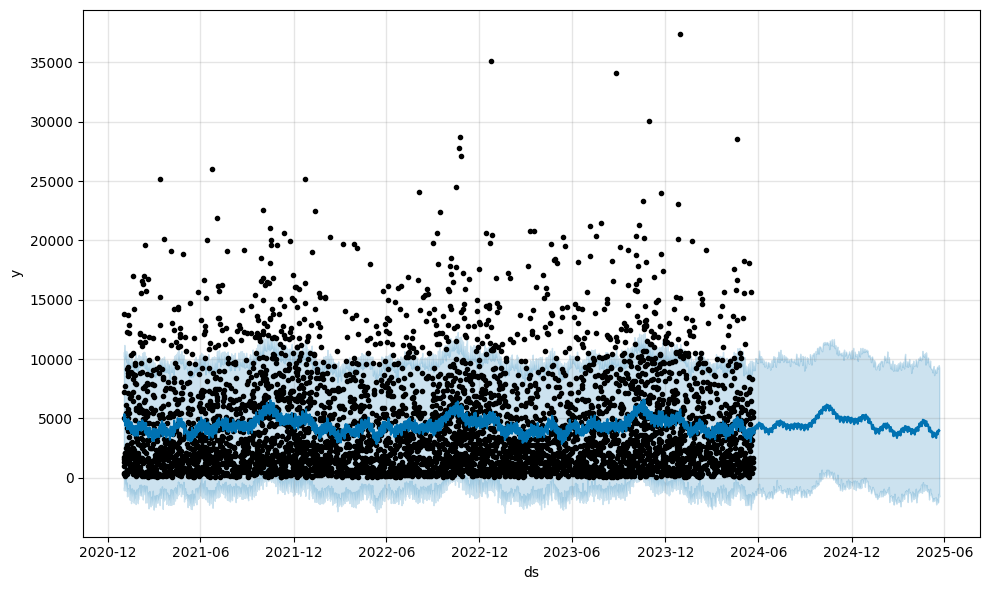

In [13]:
fig1 = m.plot(forecast)

/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the o

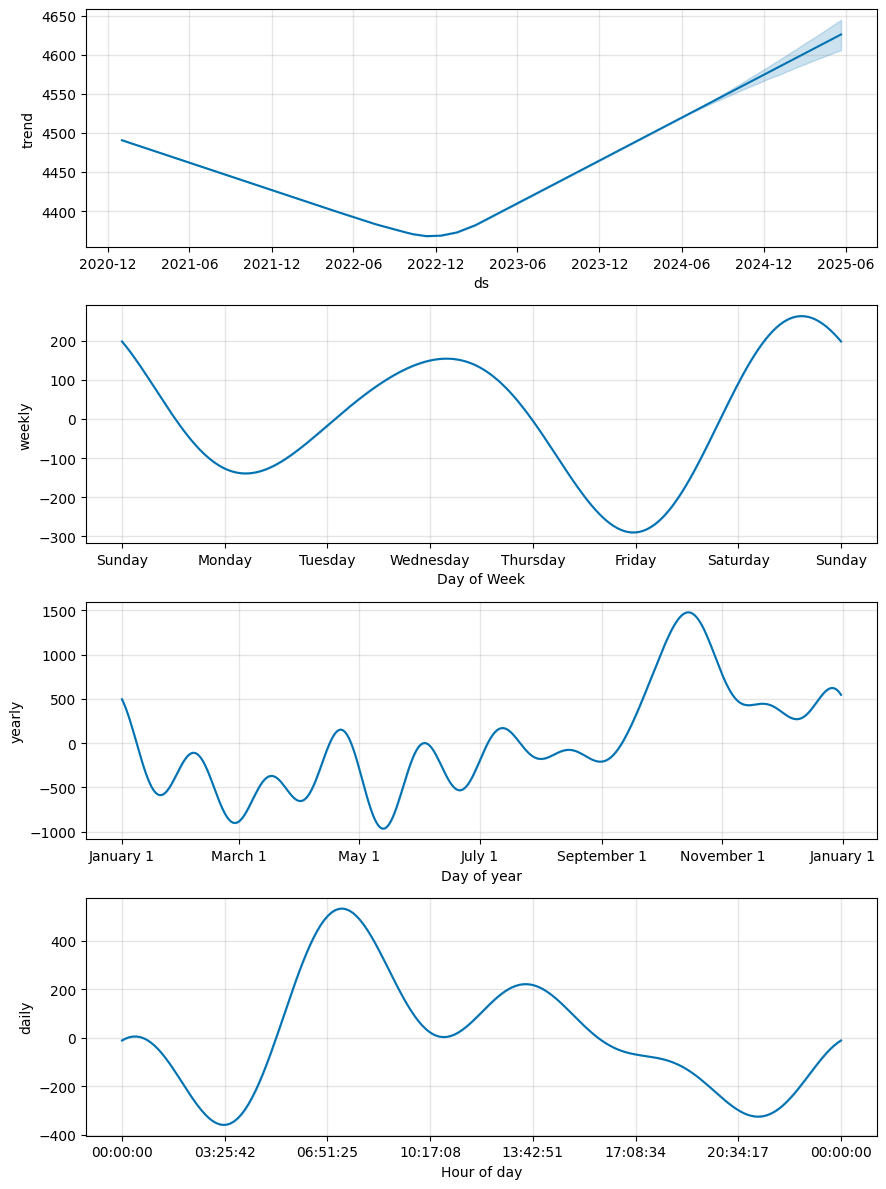

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
fig1.savefig('../home/static/fig1.png')
fig2.savefig('../home/static/fig2.png')